# Uncertainty Quantification Project

## Codes Part I, II

### Abhishek Chandra - M2CHPS (University of Lille)

In [39]:
# importing support libraries

import numpy as np                   # for making arrays, martix, calculating mean, variance etc.
import matplotlib.pyplot as plt      # for plottimg histograms etc
from scipy.stats import norm         # To use in gaussian distribution

In [40]:
# Defining constant input parameters of the model

rcul = 8.8e-3          # radius of the iron core
rbob = 17e-3           # external radius of the coil
rclo = 20e-3           # external radius
raim = 9.4e-3          # radius of the magnet

hclo = 6e-3            # height of base of the yoke
hent = 6e-3            # height of the air gap
hbob = 9e-3            # height of the coil
hpm = 5e-3             # height of the mobil plate

mur = 3000             # relative permeability of the yoke
n = 3200               # number of turns

In [41]:
# Defining random input parameters of the model (at the moment feeding deterministic values)

br = 1.2               # remanent magnetic flux density of the magnet     uncertainty - 5%
haim = 10e-3           # height of the magnet                             uncertainty - 5%
e = 0.5e-3             # air gap between the core and the yoke            uncertainty - 15%
ep = 5e-5              # parasitic air gap                                uncertainty - 40%
current = 0.0652       # current in the coil                              uncertainty - 10%

In [42]:
# Defining Constant
mu0=4*np.pi*1e-7                                                 # permeability of the air

#Calculation of the reluctances
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  # reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  # reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     # reluctance of the magnet
ksia=br*haim/mu0                                                  # magnetomotive force of the magnet

# Calculation of the flux
# When no currrent is supplied

phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                          # flux flowing through the permanent magnet
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                              # magnetic flux in the mobil plate

#calculation of force 1
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

# When currrent is supplied

phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))   # flux flowing through the permanent magnet
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)             # magnetic flux in the mobil plate

#calculation of force 2
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
print("Determinitic mean of force 1: ",np.mean(force1))
print("Determinitic mean of force 2: ",np.mean(force2))
print("Determinitic std of force 1: ",np.std(force1))
print("Determinitic std of force 2: ",np.std(force2))

Determinitic mean of force 1:  147.80442684301696
Determinitic mean of force 2:  0.00015857704866025844
Determinitic std of force 1:  0.0
Determinitic std of force 2:  0.0


# Part - I

### In this part we will consider random variable only in the following variables
br = 1.2;
haim = 10e-3;
e = 0.5e-3;
ep = 5e-5;
current = 0.0652

## Question 1.1 and 1.2

In [43]:
# Defining R - number of samples to be generated

R = 10000

In [44]:
# Defining bounds of br from which samples have to be generated
br_min = br - 0.05*br
br_max = br + 0.05*br
haim_min = haim - 0.05*haim  
haim_max = haim + 0.05*haim   
e_min = e - 0.15*e
e_max = e + 0.15*e
ep_min = ep - 0.4*ep 
ep_max = ep + 0.4*ep 
current_min = current  - 0.1*current
current_max = current  + 0.1*current

### We start with having uncertainties in one input at a time. Uncomment the parameter which you want to make nondeterministic. We start with uniform distribution

In [51]:
# Generating R samples from uniform distribution -- uncomment the required one

br = np.random.uniform(br_min, br_max, R)
haim = np.random.uniform(haim_min, haim_max, R)
e = np.random.uniform(e_min, e_max, R)
ep = np.random.uniform(ep_min, ep_max, R)
current = np.random.uniform(current_min, current_max, R)

In [52]:
# Defining Constant
mu0=4*np.pi*1e-7                                                 # permeability of the air

#Calculation of the reluctances
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  # reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  # reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     # reluctance of the magnet
ksia=br*haim/mu0                                                  # magnetomotive force of the magnet

# Calculation of the flux
# When no currrent is supplied

phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                          # flux flowing through the permanent magnet
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                              # magnetic flux in the mobil plate

#calculation of force 1
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

# When currrent is supplied

phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))   # flux flowing through the permanent magnet
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)             # magnetic flux in the mobil plate

#calculation of force 2
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

In [53]:
# Calculating mean for forces

mean_force1 = np.mean(force1)
mean_force2 = np.mean(force2)
print("mean value of force 1: ",mean_force1)
print("mean value of force 2: ",mean_force2)

mean value of force 1:  149.86896081326387
mean value of force 2:  1.828197804479219


In [54]:
# Calculating standard deviation for forces

std_force1 = np.std(force1)
std_force2 = np.std(force2)
print("standard deviation of force 1: ",std_force1)
print("standard deviation of force 2: ",std_force2)

standard deviation of force 1:  24.57087723752309
standard deviation of force 2:  2.235007270051441


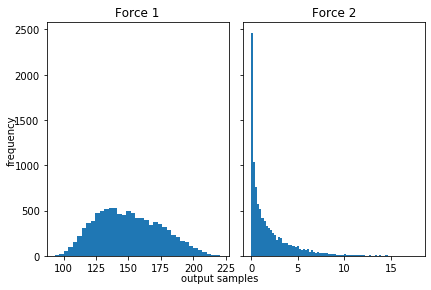

In [55]:
# Plotting histograms for forces

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(force1, bins= 'auto')
axs[1].hist(force2, bins= 'auto')
axs[0].set_title('Force 1')
axs[1].set_title('Force 2')
fig.text(0.5, 0.02, 'output samples', ha='center', va='center')
fig.text(0.02, 0.5, 'frequency', ha='center', va='center', rotation='vertical')
plt.savefig('All random uniform.jpg')
plt.show()

### Next, we perform the simulations using the normal distribution

In [16]:
br_normal_mean = (br_min + br_max)/2
br_normal_variance = ((br_max - br_min)**2)/12
haim_normal_mean = (haim_min + haim_max)/2
haim_normal_variance = ((haim_max - haim_min)**2)/12
e_normal_mean = (e_min + e_max)/2
e_normal_variance = ((e_max - e_min)**2)/12
ep_normal_mean = (ep_min + ep_max)/2
ep_normal_variance = ((ep_max - ep_min)**2)/12
current_normal_mean = (current_min + current_max)/2
current_normal_variance = ((current_max - current_min)**2)/12

In [17]:
# Generating R samples from normal distribution

br = np.random.normal(br_normal_mean, br_normal_variance, R)
haim = np.random.normal(haim_normal_mean, haim_normal_variance, R)
e = np.random.normal(e_normal_mean, e_normal_variance, R)
ep = np.random.normal(ep_normal_mean, ep_normal_variance, R)
current = np.random.normal(current_normal_mean, current_normal_variance, R)

In [18]:
# Defining Constant
mu0=4*np.pi*1e-7                                                 # permeability of the air

#Calculation of the reluctances
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  # reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  # reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     # reluctance of the magnet
ksia=br*haim/mu0                                                  # magnetomotive force of the magnet

# Calculation of the flux
# When no currrent is supplied

phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                          # flux flowing through the permanent magnet
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                              # magnetic flux in the mobil plate

#calculation of force 1
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

# When currrent is supplied

phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))   # flux flowing through the permanent magnet
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)             # magnetic flux in the mobil plate

#calculation of force 2
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

In [19]:
# Calculating mean for forces

mean_force1 = np.mean(force1)
mean_force2 = np.mean(force2)
print("mean value of force 1: ",mean_force1)
print("mean value of force 2: ",mean_force2)

mean value of force 1:  147.80888442866137
mean value of force 2:  0.0003098955095138679


In [20]:
# Calculating standard deviation for forces

std_force1 = np.std(force1)
std_force2 = np.std(force2)
print("standard deviation of force 1: ",std_force1)
print("standard deviation of force 2: ",std_force2)

standard deviation of force 1:  0.2955077270644268
standard deviation of force 2:  0.00038396966904936084


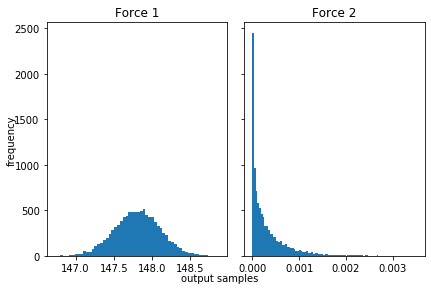

In [21]:
# Plotting histograms for forces

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(force1, bins= 'auto')
axs[1].hist(force2, bins= 'auto')
axs[0].set_title('Force 1')
axs[1].set_title('Force 2')
fig.text(0.5, 0.02, 'output samples', ha='center', va='center')
fig.text(0.02, 0.5, 'frequency', ha='center', va='center', rotation='vertical')
plt.savefig('All random normal.jpg')
plt.show()

# Part II

In [56]:
N = 0
for i in range(R):
    if force1[i]<120:
        N =  N + 1
p = N/R
print(p)

0.1123


In [57]:
np.sqrt(p*(1-p)/R)

0.0031573518967641222

In [58]:
N = 0
for i in range(R):
    if force2[i]>10:
        N =  N + 1
p = N/R
print(p)

0.0098


In [59]:
np.sqrt(p*(1-p)/R)

0.0009850867982061275

In [60]:
N = 0
for i in range(R):
    if force1[i]<120 or force2[i]>10:
        N =  N + 1
p = N/R
print(p)

0.12


In [61]:
np.sqrt(p*(1-p)/R)

0.003249615361854384